In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from glob import glob

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Load the CSV file

In [2]:
df = pd.read_csv('../input/emotions/emotions.csv')

# Explore the data

In [3]:
# Display the first few rows of the DataFrame
print(df.head())

   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [4]:
# Get information about the DataFrame, e.g., data types, null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB
None


In [5]:
# Descriptive statistics of numerical columns
print(df.describe())

        # mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  ...  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  ...   
mean      0.025378     0.052282     0.301655     0.036793     0.083567  ...   
std      17.981796     8.509174    68.098894    17.010031    18.935378  ...   
min    -218.00000

# Data Cleaning:
Check for missing values and handle them if necessary. 

In [6]:
# Check for missing values
print(df.isnull().sum())

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64


Seems We have no missing values in any column of our DataFrame. Each column has a count of 0, indicating that there are no null or missing values in those respective columns.

# Handling Outliers

In [7]:
z_scores = stats.zscore(df['mean_2_a'])
df = df[(z_scores < 3)]  # Keep only rows within 3 standard deviations

In [8]:
z_scores = stats.zscore(df['mean_2_a'])
df = df[(z_scores < 3) & (z_scores > -3)]

# Exploratory Data Analysis (EDA)

# Distribution of Labels

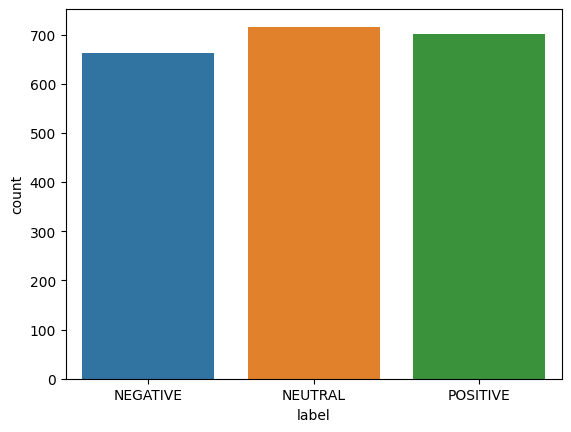

In [9]:
sns.countplot(x='label', data=df)
plt.show()

# Correlation Matrix

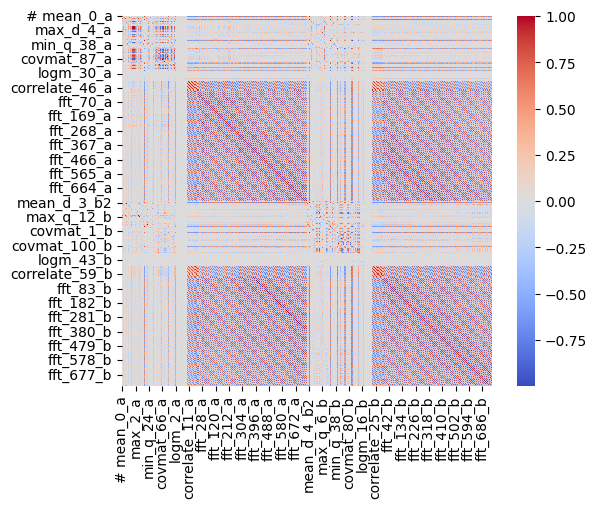

In [10]:
# Assuming 'label' is the name of target column
labels = df['label']
df_numeric = df.drop('label', axis=1)  # Exclude the 'label' column for now

# One-hot encode the 'label' column
df_encoded = pd.get_dummies(labels, prefix='label')

# Concatenate the one-hot encoded labels with the numeric features
df_combined = pd.concat([df_numeric, df_encoded], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)
plt.show()

# Feature Distributions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


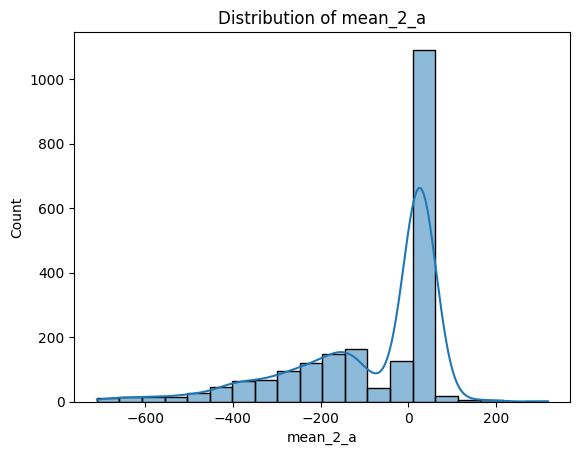

In [11]:
sns.histplot(df['mean_2_a'], bins=20, kde=True)
plt.title('Distribution of mean_2_a')
plt.show()

# Box Plots for Outliers

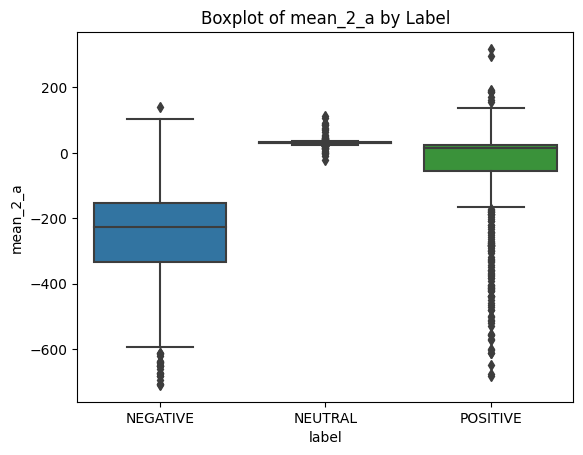

In [12]:
sns.boxplot(x='label', y='mean_2_a', data=df)
plt.title('Boxplot of mean_2_a by Label')
plt.show()

This helps identify if there are significant differences in feature values across different emotion labels.

# Pair Plots

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


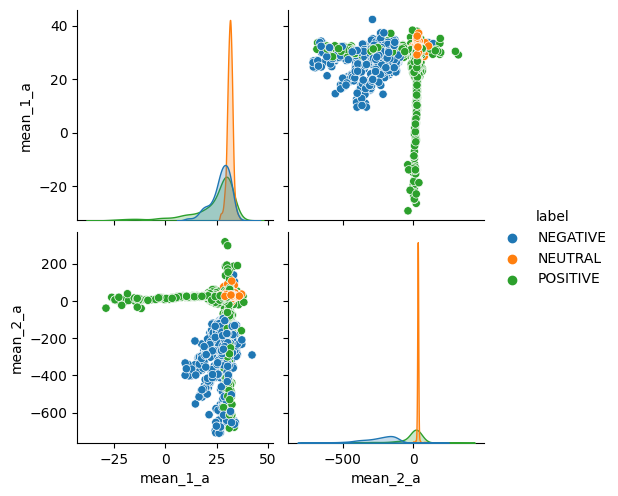

In [13]:
sns.pairplot(df[['mean_1_a', 'mean_2_a', 'label']], hue='label')
plt.show()

# Data Splitting

In [14]:
from sklearn.model_selection import train_test_split

# 'label' is target variable
X = df.drop('label', axis=1)  # Features (all columns except 'label')
y = df['label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#In this example, test_size=0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training. 

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1663, 2548)
X_test shape: (416, 2548)
y_train shape: (1663,)
y_test shape: (416,)


# Statistical Analysis

In [15]:
# '# mean_0_a' is one of your numeric features
numeric_feature = '# mean_0_a'

# Group by 'label' and calculate summary statistics
summary_stats = df.groupby('label')[numeric_feature].agg(['mean', 'median', 'std']).reset_index()

# Display the summary statistics
print(summary_stats)

      label       mean  median       std
0  NEGATIVE  10.934233    12.1  8.023293
1   NEUTRAL  28.851760    28.9  5.329904
2  POSITIVE   6.591094     7.4  9.749051


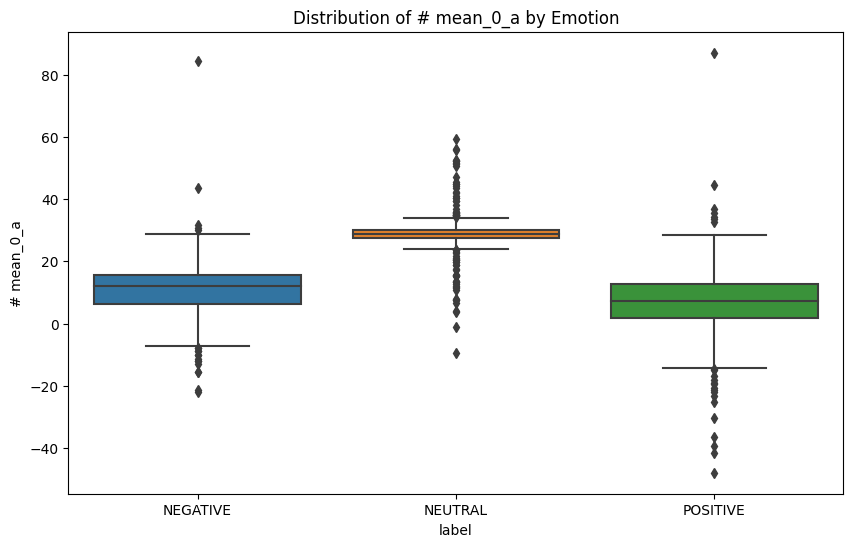

In [16]:
# Box plot for the numeric feature by emotion
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y=numeric_feature, data=df, order=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.title(f'Distribution of {numeric_feature} by Emotion')
plt.show()

# Correlation Analysis

In [17]:
# Extract numeric features (excluding 'label' column)
numeric_features = df.drop('label', axis=1).select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## THE END